In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [32]:
data_path = 'data/'
# Load track data from csv file
track_data = pd.read_csv(os.path.join(data_path, 'Budapest-track.csv'))

racing_line_data = pd.read_csv(os.path.join(data_path, 'Budapest-raceline.csv'))

racing_line_data.shape

(864, 2)

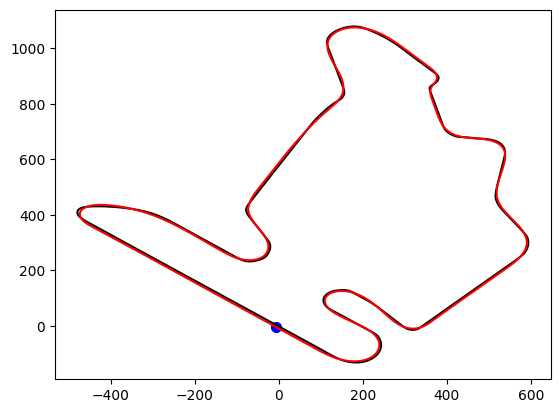

In [29]:
# Plot data points
fig, ax = plt.subplots()
ax.plot(track_data['x_m'], track_data['y_m'], 'k') # Track centerline
ax.plot(racing_line_data['x_m'], racing_line_data['y_m'], 'r') # Racing line

Pour dessiner les limites de la pistes on doit calculer les points appartenant à la ligne de limtie de gauche et de droite.
Pour se faire on a les distances à gauche à droite de la ligne du centre.

A partir d'un point de la ligne central on doit trouver les 2 points des limites correspondants. Pour définir la gauche et la droite on doit connaitre le direction du point.
La direction du point est définie par le vecteur $v_i$ formé par ce point $p_i$ et le point suivant $p_{i+1}$.

$$
    v_d = v_{i+1} - v_i
$$

In [64]:
track_data.iloc[0][['x_m', 'y_m']]

x_m   -2.447973
y_m    0.125932
Name: 0, dtype: float64

In [71]:
def calculate_track_edge(data_point, next_data_point):
    v1 = data_point[['x_m', 'y_m']]
    v2 = next_data_point[['x_m', 'y_m']]
    d_left = data_point['w_tr_left_m']
    d_right = data_point['w_tr_right_m']

    v_direction = v2 - v1
    v_direction = v_direction / np.linalg.norm(v_direction) # normalize
    v_orthogonal = pd.Series(
        {
            'x_m': -v_direction['y_m'],
            'y_m': v_direction['x_m']
        }
    )

    left_edge = v1 + v_orthogonal * d_left
    right_edge = v1 - v_orthogonal * d_right

    return left_edge, right_edge

In [73]:
track_data

,x_m,y_m,w_tr_right_m,w_tr_left_m
0,-2.447973,0.125932,6.187,6.476
1,-6.304742,3.307700,6.190,6.470
2,-10.161890,6.488986,6.192,6.465
3,-14.019368,9.669851,6.195,6.460
4,-17.877125,12.850358,6.198,6.455
...,...,...,...,...
871,16.828429,-15.792341,6.174,6.501
872,12.974308,-12.607221,6.176,6.496
873,9.119557,-9.422896,6.179,6.491
874,5.264226,-6.239304,6.182,6.486


In [68]:
v1 = track_data.iloc[0][['x_m', 'y_m']]
v2 = track_data.iloc[1][['x_m', 'y_m']]

d_left = track_data.iloc[0]['w_tr_left_m']
d_right = track_data.iloc[0]['w_tr_right_m']

vd = v2 - v1
v_ortho = pd.Series(
    {
        'x_m': -vd['y_m'],
        'y_m':vd['x_m']
    }
)
v_ortho_norm = v_ortho / np.linalg.norm(v_ortho)
lg_1 = v1 + v_ortho_norm * d_left
rg_1 = v1 - v_ortho_norm * d_right

In [66]:
lg_1

x_m   -6.569138
y_m   -4.869524
dtype: float64

In [49]:
def draw_track(center_x, center_y, width, height):
    # Plot data points
    fig, ax = plt.subplots()
    ax.set_xlim(center_x - width / 2, center_x + width / 2)
    ax.set_ylim(center_y - height / 2, center_y + height / 2)

    ax.plot(track_data['x_m'], track_data['y_m'], 'k') # Track centerline
    #ax.plot(racing_line_data['x_m'], racing_line_data['y_m'], 'r') # Racing line
    return fig, ax

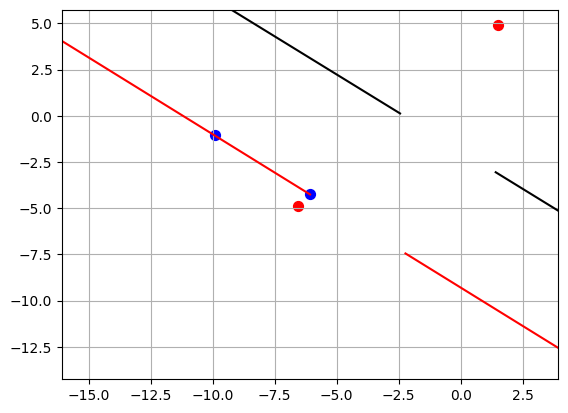

In [70]:
p1 = racing_line_data.iloc[0]
p2 = racing_line_data.iloc[1]

fig, ax = draw_track(p1['x_m'], p1['y_m'], 20, 20)

ax.scatter(p1['x_m'], p1['y_m'], 50, 'b')
ax.scatter(p2['x_m'], p2['y_m'], 50, 'b')
ax.scatter(lg_1['x_m'], lg_1['y_m'], 50, 'r')
ax.scatter(rg_1['x_m'], rg_1['y_m'], 50, 'r')
ax.grid()

On a une résolution de 864 points par tour pour Budapest. On peut essayer de calculer la distance en metres entre chaques points avec la distance euclidiène.